
# 📊 Stock Market Analytics & Risk-Aware Portfolio Optimization

**Author:** Vinay Tiwari  
**Tools:** Python, Pandas, NumPy, yfinance, Scikit-learn, PyPortfolioOpt, Matplotlib, Seaborn  

---

## 📌 Project Overview

This project performs data analytics and financial risk analysis on U.S. tech stocks to:

- Analyze price trends and volatility
- Predict market movement using machine learning
- Build a risk-aware optimized portfolio

It demonstrates data wrangling, financial analytics, visualization, and predictive modeling.


In [1]:

# 📦 Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.risk_models import sample_cov
from pypfopt import plotting


## 📥 Data Collection

In [2]:

tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime.now()

raw_data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=False)
adj_close = raw_data.xs('Adj Close', axis=1, level=1)
adj_close.to_csv("stock_data.csv")
adj_close.head()


[*********************100%***********************]  5 of 5 completed


Ticker,AMZN,AAPL,MSFT,GOOG,TSLA
Date,,,,,
2020-01-02,94.900497,72.620850,153.042328,67.964508,28.684000
2020-01-03,93.748497,71.914810,151.136658,67.630989,29.534000
2020-01-06,95.143997,72.487854,151.527313,69.298576,30.102667
2020-01-07,95.343002,72.146927,150.145752,69.255341,31.270666
2020-01-08,94.598503,73.307518,152.537262,69.801094,32.809334


## 📈 Exploratory Data Analysis

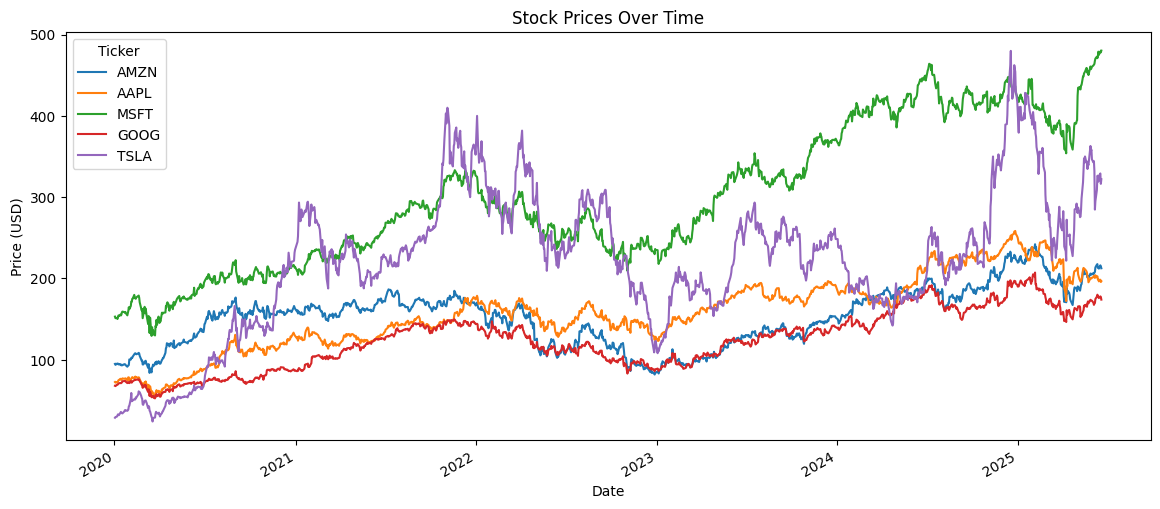

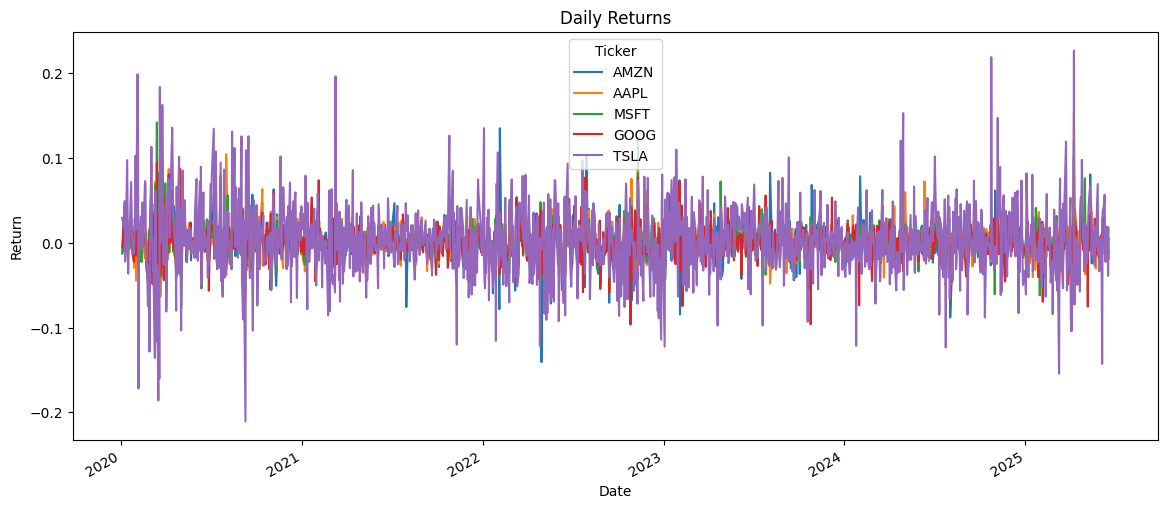

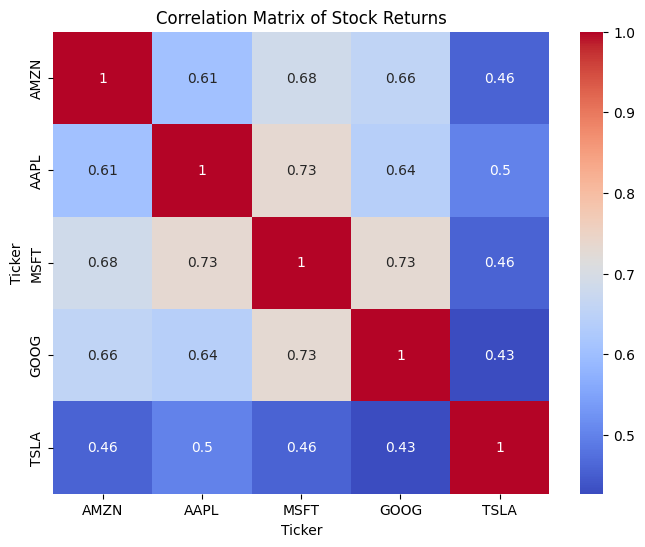

In [3]:

adj_close.plot(figsize=(14, 6), title="Stock Prices Over Time")
plt.ylabel("Price (USD)")
plt.show()

returns = adj_close.pct_change().dropna()
returns.plot(figsize=(14, 6), title="Daily Returns")
plt.ylabel("Return")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Stock Returns")
plt.show()


## 📉 Risk Analysis

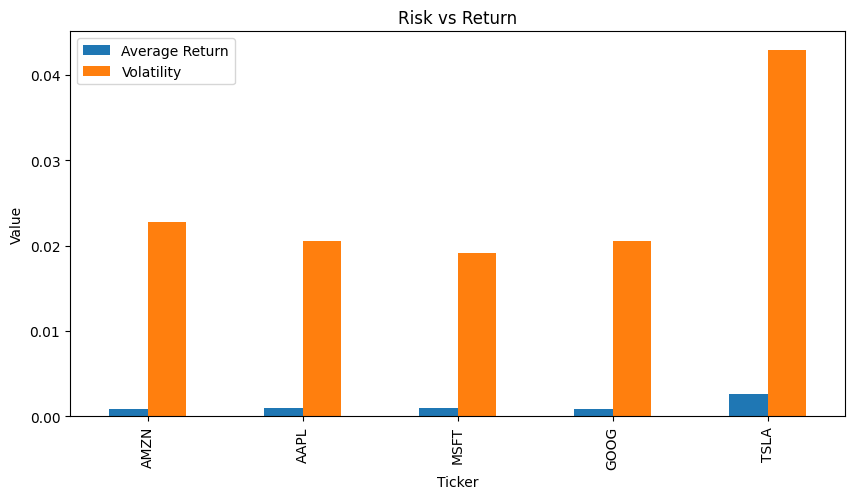

In [4]:

volatility = returns.std()
avg_return = returns.mean()

risk_df = pd.DataFrame({'Average Return': avg_return, 'Volatility': volatility})
risk_df.plot(kind='bar', figsize=(10, 5), title="Risk vs Return")
plt.ylabel("Value")
plt.show()


## 🤖 Stock Trend Prediction using Machine Learning

Accuracy: 0.4354243542435424
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.99      0.60       117
           1       0.67      0.01      0.03       154

    accuracy                           0.44       271
   macro avg       0.55      0.50      0.31       271
weighted avg       0.57      0.44      0.27       271



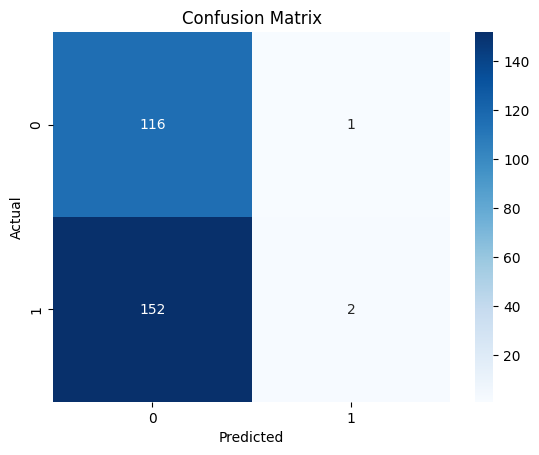

In [5]:

# Generate features and labels
stock = 'AAPL'
df = adj_close[[stock]].copy()
df['Return'] = df[stock].pct_change()
df['Direction'] = np.where(df['Return'] > 0, 1, 0)

df['SMA_5'] = df[stock].rolling(window=5).mean()
df['SMA_20'] = df[stock].rolling(window=20).mean()
df['Volatility'] = df['Return'].rolling(window=10).std()

df.dropna(inplace=True)

X = df[['SMA_5', 'SMA_20', 'Volatility']]
y = df['Direction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 💼 Portfolio Optimization

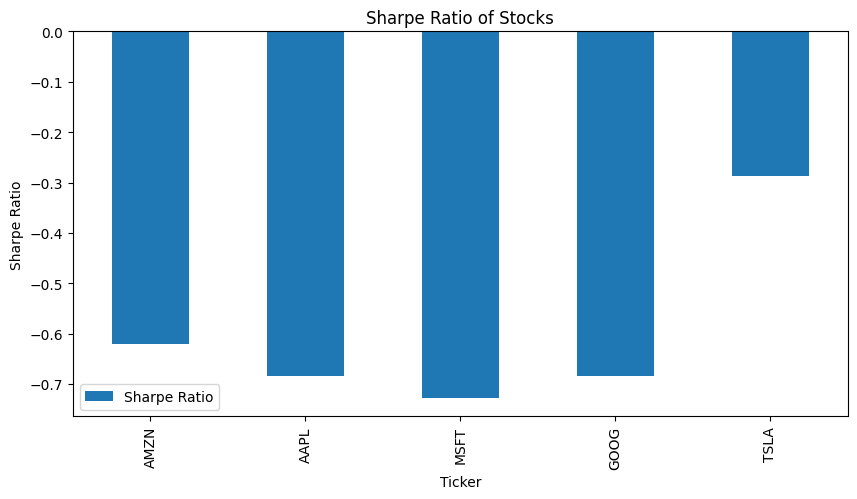

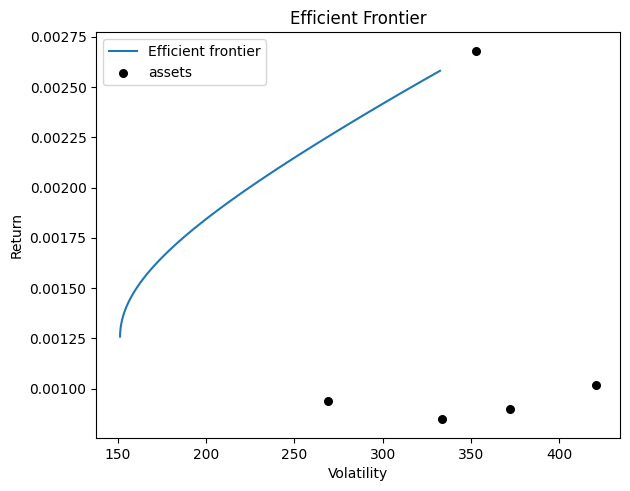

In [6]:

risk_free_rate = 0.015
sharpe_ratios = (avg_return - risk_free_rate) / volatility
sharpe_df = pd.DataFrame({'Sharpe Ratio': sharpe_ratios})
sharpe_df.plot(kind='bar', figsize=(10, 5), title='Sharpe Ratio of Stocks')
plt.ylabel("Sharpe Ratio")
plt.show()

ef = EfficientFrontier(avg_return, sample_cov(returns))
plotting.plot_efficient_frontier(ef, show_assets=True)
plt.title("Efficient Frontier")
plt.show()



## 💡 Key Insights

- Microsoft (MSFT) and Apple (AAPL) exhibited consistent returns with low volatility, making them suitable for conservative investors.
- Tesla (TSLA) showed high volatility and high returns, aligning more with aggressive investment strategies.
- Correlation matrix revealed strong positive correlation between MSFT and AAPL, while TSLA had a more independent movement.

## 🧭 Recommendations

- For a low-risk portfolio, allocate higher weights to AAPL and MSFT.
- To pursue higher returns with acceptable risk, include a smaller proportion of TSLA.
- Regularly rebalance the portfolio using the efficient frontier optimization model.
